In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [5]:
data.isna().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

<function matplotlib.pyplot.show(close=None, block=None)>

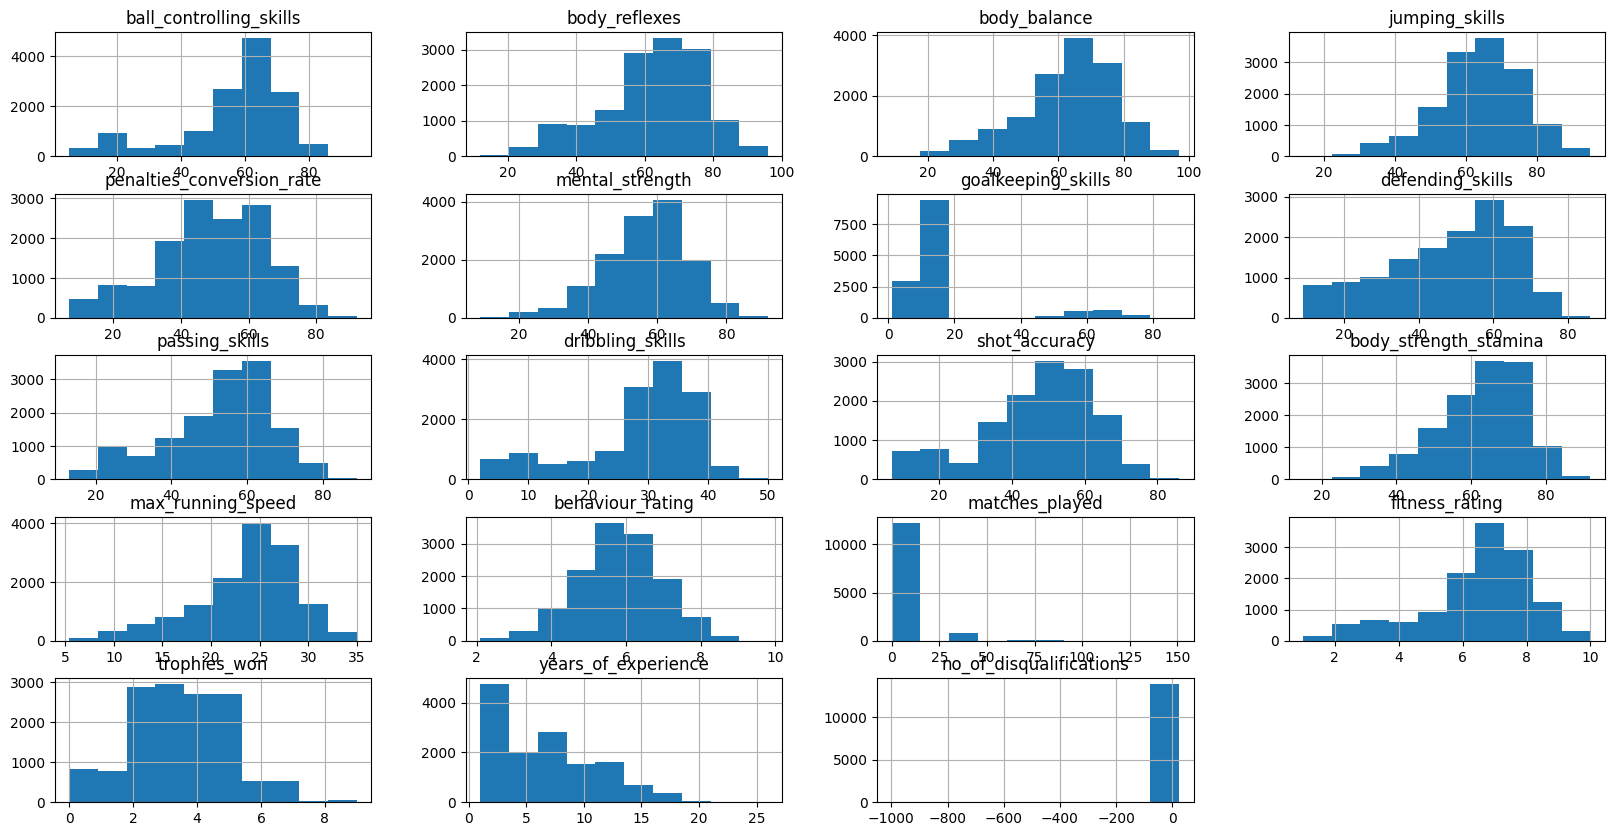

In [7]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,10))
plt.show

In [8]:
for col in ['ball_controlling_skills','jumping_skills','mental_strength','penalties_conversion_rate','shot_accuracy','behaviour_rating','matches_played','fitness_rating','years_of_experience','no_of_disqualifications']:
  data[col]=data[col].fillna(data[col].median())

In [9]:
data.isna().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills        0
body_reflexes                  0
body_balance                   0
jumping_skills                 0
penalties_conversion_rate      0
mental_strength                0
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                  0
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating               0
matches_played                 0
fitness_rating                 0
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience            0
no_of_disqualifications        0
selection                      0
dtype: int

Label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data['strong_foot']=le.fit_transform(data['strong_foot'])

In [11]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data['coaching']=le.fit_transform(data['coaching'])

In [12]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data['gender']=le.fit_transform(data['gender'])

In [13]:
data=data.dropna()

In [14]:
data.isna().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

Corelation Matrix

<ipython-input-15-4535843b8a95>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix=data.corr()


<Axes: >

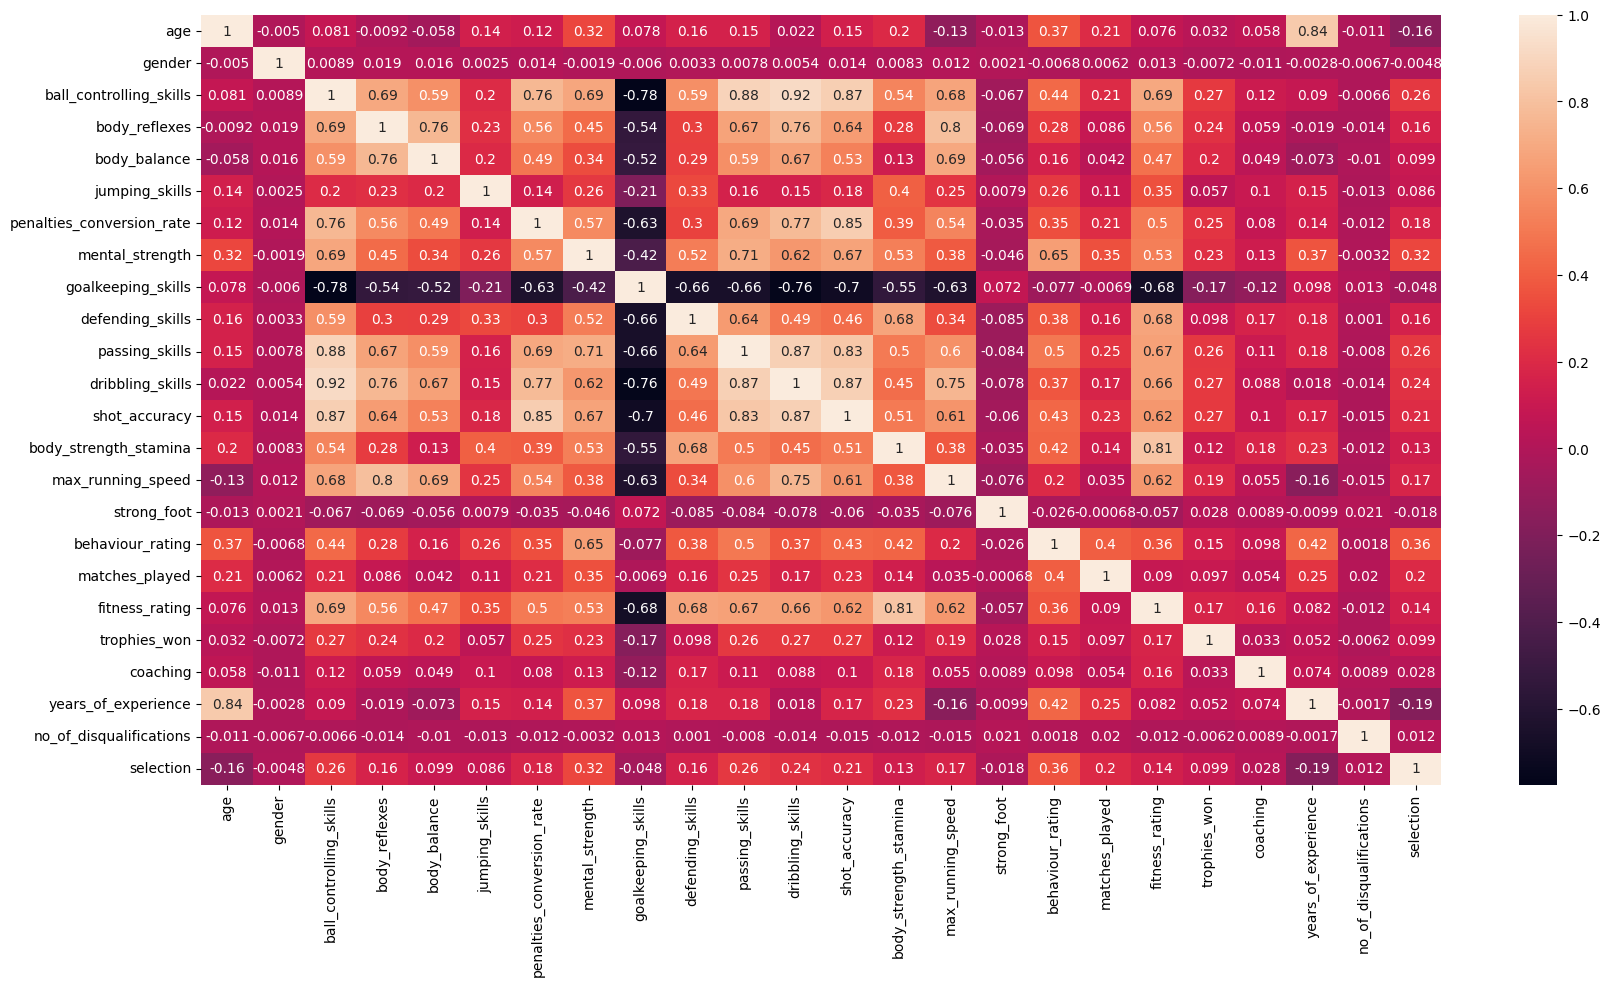

In [15]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,annot=True)

In [16]:
data= data.drop(['weight','no_of_disqualifications','jumping_skills','gender','strong_foot','height','goalkeeping_skills','body_balance'], axis=1)

In [17]:
data.isna().sum()

player_id                    0
name                         0
age                          0
country                      0
ball_controlling_skills      0
body_reflexes                0
penalties_conversion_rate    0
mental_strength              0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
selection                    0
dtype: int64

In [18]:
data= data.drop(['player_id','name','country'], axis=1)

In [19]:
data.isna().sum()

age                          0
ball_controlling_skills      0
body_reflexes                0
penalties_conversion_rate    0
mental_strength              0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
selection                    0
dtype: int64

Outliers

TypeError: ignored

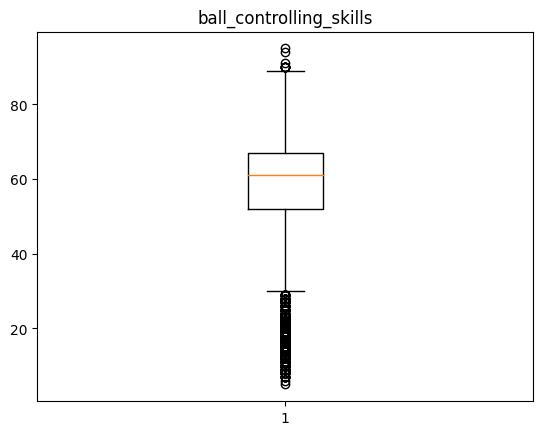

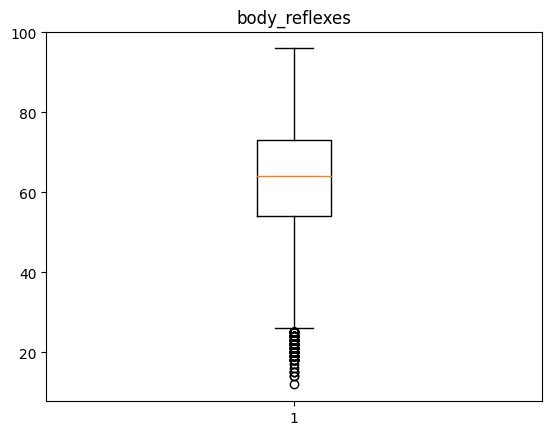

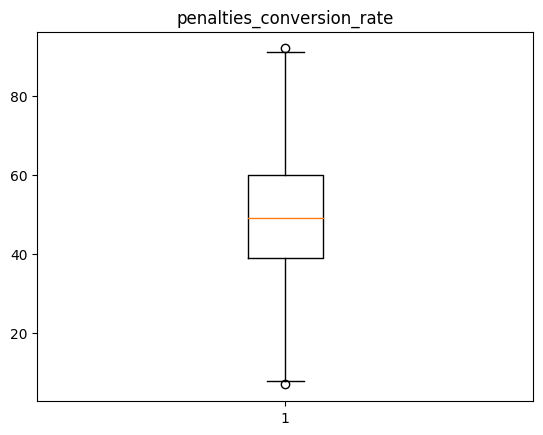

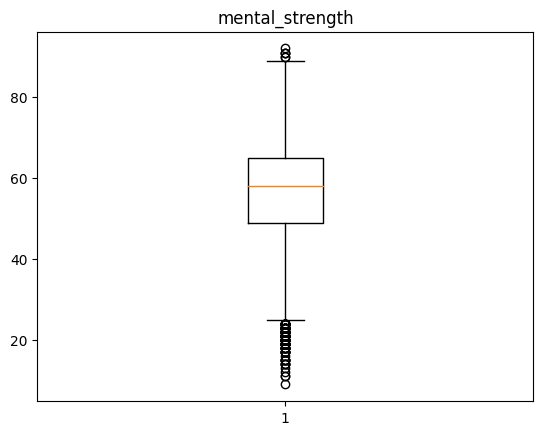

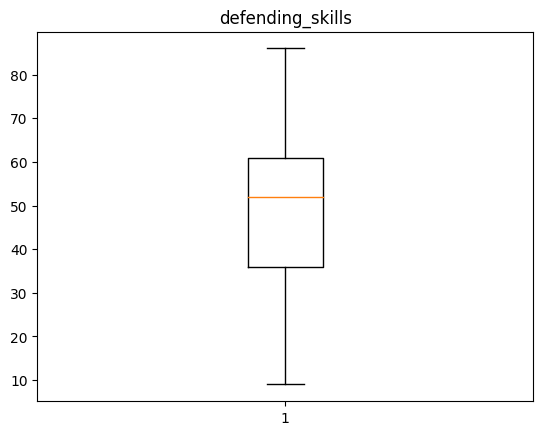

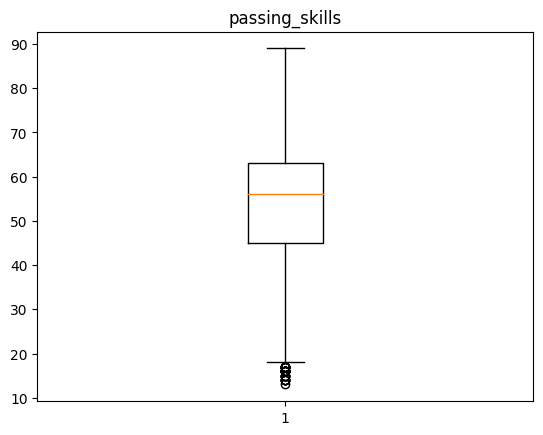

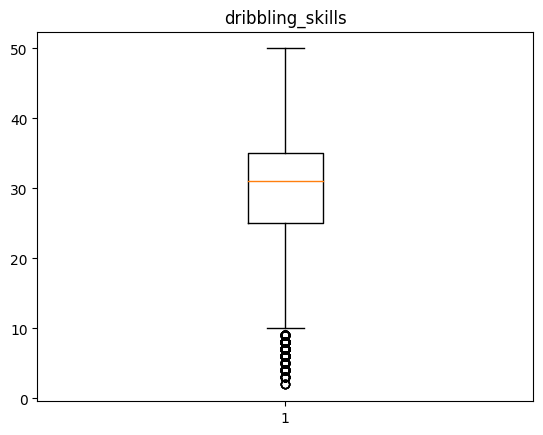

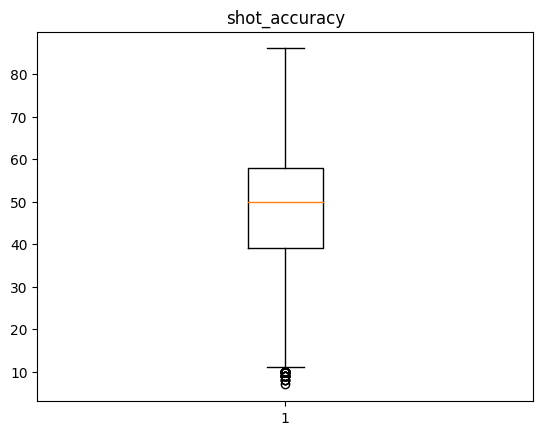

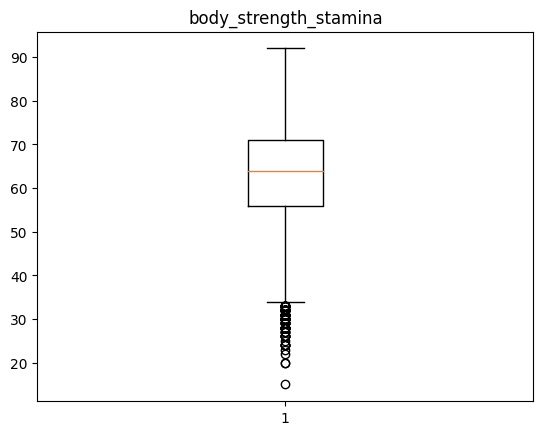

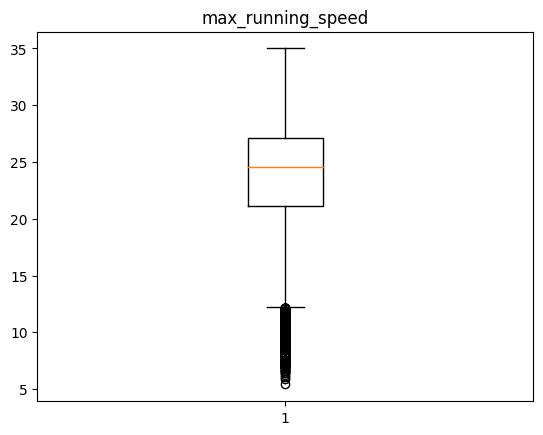

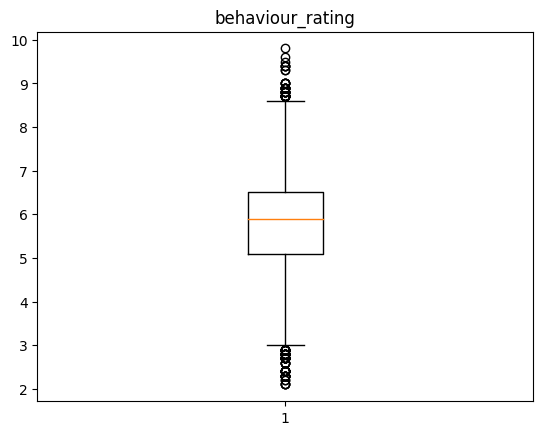

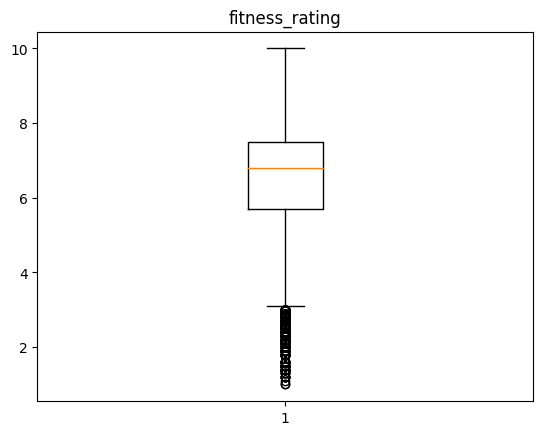

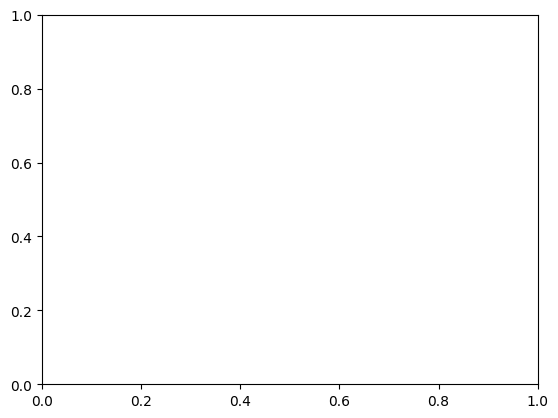

In [25]:
for i in ['ball_controlling_skills', 'body_reflexes','penalties_conversion_rate','mental_strength','defending_skills','passing_skills','dribbling_skills','shot_accuracy','body_strength_stamina','max_running_speed','behaviour_rating','fitness_rating','dedication_level']:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

In [26]:
Q1=np.percentile(data['ball_controlling_skills'],25,interpolation='midpoint')
Q2=np.percentile(data['ball_controlling_skills'],50,interpolation='midpoint')
Q3=np.percentile(data['ball_controlling_skills'],75,interpolation='midpoint')

<ipython-input-26-edd1a743e33a>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['ball_controlling_skills'],25,interpolation='midpoint')
<ipython-input-26-edd1a743e33a>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['ball_controlling_skills'],50,interpolation='midpoint')
<ipython-input-26-edd1a743e33a>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they use

In [27]:
data['ball_controlling_skills'].median()

61.0

In [30]:
IQR=Q3-Q1

In [31]:
low_lim=Q1-(1.5*IQR)
up_lim=Q1+(1.5*IQR)

In [33]:
outlier=[]

In [34]:
for x in data['ball_controlling_skills']:
  if ((x>up_lim)or (x<low_lim)):
    outlier.append(x)

In [35]:
outlier

[77.0,
 79.0,
 84.0,
 76.0,
 78.0,
 86.0,
 29.0,
 81.0,
 75.0,
 17.0,
 19.0,
 20.0,
 18.0,
 75.0,
 25.0,
 17.0,
 78.0,
 77.0,
 9.0,
 17.0,
 22.0,
 77.0,
 10.0,
 24.0,
 29.0,
 17.0,
 20.0,
 77.0,
 79.0,
 21.0,
 15.0,
 21.0,
 13.0,
 20.0,
 29.0,
 77.0,
 75.0,
 76.0,
 77.0,
 25.0,
 13.0,
 16.0,
 11.0,
 81.0,
 10.0,
 13.0,
 77.0,
 75.0,
 10.0,
 10.0,
 20.0,
 25.0,
 22.0,
 81.0,
 23.0,
 10.0,
 19.0,
 11.0,
 18.0,
 12.0,
 10.0,
 9.0,
 12.0,
 11.0,
 77.0,
 13.0,
 8.0,
 17.0,
 29.0,
 14.0,
 21.0,
 20.0,
 8.0,
 85.0,
 15.0,
 29.0,
 18.0,
 77.0,
 20.0,
 21.0,
 15.0,
 81.0,
 27.0,
 77.0,
 22.0,
 81.0,
 22.0,
 19.0,
 14.0,
 83.0,
 25.0,
 16.0,
 10.0,
 20.0,
 78.0,
 14.0,
 11.0,
 15.0,
 17.0,
 28.0,
 24.0,
 10.0,
 84.0,
 81.0,
 84.0,
 22.0,
 82.0,
 21.0,
 9.0,
 16.0,
 18.0,
 14.0,
 76.0,
 20.0,
 18.0,
 12.0,
 21.0,
 82.0,
 20.0,
 18.0,
 17.0,
 25.0,
 91.0,
 76.0,
 75.0,
 18.0,
 83.0,
 17.0,
 16.0,
 16.0,
 77.0,
 18.0,
 22.0,
 22.0,
 75.0,
 17.0,
 81.0,
 82.0,
 23.0,
 16.0,
 13.0,
 89.0,
 78.0,
 16.

In [36]:
ind1=data['ball_controlling_skills']<low_lim
data.loc[ind1].index

Int64Index([   42,    48,    51,    53,    58,    79,    86,   122,   128,
              130,
            ...
            13923, 13927, 13933, 13945, 13946, 13947, 13952, 13964, 13969,
            13975],
           dtype='int64', length=1492)

In [37]:
ind2=data['ball_controlling_skills']>up_lim
data.loc[ind2].index

Int64Index([    0,     3,    10,    14,    17,    20,    44,    45,    61,
               90,
            ...
            13773, 13827, 13830, 13877, 13894, 13895, 13932, 13940, 13956,
            13961],
           dtype='int64', length=790)

In [40]:
data=data.drop([42,48,51,53,58,79,86,122,128,13923,13927,13933,13945,13947,13952,13964,13969,13975,0,3,10,14,17,20,44,45,61,90])

In [41]:
Q1=np.percentile(data['mental_strength'],25,interpolation='midpoint')
Q2=np.percentile(data['mental_strength'],50,interpolation='midpoint')
Q3=np.percentile(data['mental_strength'],75,interpolation='midpoint')

<ipython-input-41-d76f8ad9b3f4>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['mental_strength'],25,interpolation='midpoint')
<ipython-input-41-d76f8ad9b3f4>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['mental_strength'],50,interpolation='midpoint')
<ipython-input-41-d76f8ad9b3f4>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated N

In [42]:
data['mental_strength'].median()

58.0

In [43]:
IQR=Q3-Q1

In [44]:
low_lim=Q1-(1.5*IQR)
up_lim=Q1+(1.5*IQR)

In [45]:
outlier=[]

In [46]:
for x in data['mental_strength']:
  if ((x>up_lim)or (x<low_lim)):
    outlier.append(x)

In [47]:
outlier

[75.0,
 78.0,
 74.0,
 79.0,
 75.0,
 79.0,
 82.0,
 23.0,
 75.0,
 77.0,
 74.0,
 74.0,
 75.0,
 74.0,
 75.0,
 17.0,
 75.0,
 80.0,
 76.0,
 74.0,
 76.0,
 75.0,
 75.0,
 81.0,
 24.0,
 74.0,
 74.0,
 22.0,
 77.0,
 74.0,
 20.0,
 84.0,
 23.0,
 24.0,
 75.0,
 20.0,
 82.0,
 79.0,
 85.0,
 76.0,
 84.0,
 77.0,
 75.0,
 76.0,
 21.0,
 78.0,
 13.0,
 19.0,
 79.0,
 90.0,
 74.0,
 77.0,
 76.0,
 24.0,
 75.0,
 78.0,
 74.0,
 78.0,
 79.0,
 24.0,
 78.0,
 91.0,
 75.0,
 79.0,
 78.0,
 78.0,
 22.0,
 79.0,
 85.0,
 74.0,
 85.0,
 74.0,
 78.0,
 22.0,
 84.0,
 75.0,
 77.0,
 79.0,
 84.0,
 76.0,
 78.0,
 77.0,
 78.0,
 21.0,
 12.0,
 23.0,
 24.0,
 74.0,
 21.0,
 74.0,
 23.0,
 24.0,
 76.0,
 77.0,
 22.0,
 22.0,
 84.0,
 79.0,
 74.0,
 75.0,
 75.0,
 74.0,
 86.0,
 83.0,
 76.0,
 74.0,
 77.0,
 19.0,
 82.0,
 79.0,
 20.0,
 22.0,
 76.0,
 76.0,
 82.0,
 18.0,
 19.0,
 77.0,
 78.0,
 80.0,
 74.0,
 24.0,
 75.0,
 74.0,
 84.0,
 76.0,
 74.0,
 74.0,
 77.0,
 79.0,
 74.0,
 74.0,
 21.0,
 75.0,
 86.0,
 86.0,
 24.0,
 85.0,
 76.0,
 74.0,
 76.0,
 77.0,
 79.0,

In [48]:
ind1=data['mental_strength']<low_lim
data.loc[ind1].index

Int64Index([  176,   302,   383,   446,   505,   508,   525,   539,   644,
              655,
            ...
            13024, 13167, 13275, 13305, 13443, 13531, 13695, 13714, 13769,
            13885],
           dtype='int64', length=172)

In [49]:
ind2=data['mental_strength']>up_lim
data.loc[ind2].index

Int64Index([    8,    13,    47,    81,   119,   131,   144,   181,   192,
              229,
            ...
            13773, 13830, 13855, 13876, 13894, 13895, 13903, 13943, 13961,
            13986],
           dtype='int64', length=857)

In [51]:
data=data.drop([176,302,383,446,505,508,525,539,644,655,13024,13167,13275,13305,13531,13714,13769,13855,8,13,47,81,119,131,144,181,192,229,13773,13830,13876,13894,13895,13903,13943,13961,13986])

In [52]:
Q1=np.percentile(data['body_strength_stamina'],25,interpolation='midpoint')
Q2=np.percentile(data['body_strength_stamina'],50,interpolation='midpoint')
Q3=np.percentile(data['body_strength_stamina'],75,interpolation='midpoint')

<ipython-input-52-7616b91e13c7>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['body_strength_stamina'],25,interpolation='midpoint')
<ipython-input-52-7616b91e13c7>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['body_strength_stamina'],50,interpolation='midpoint')
<ipython-input-52-7616b91e13c7>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (

In [53]:
data['body_strength_stamina'].median()

64.0

In [54]:
IQR=Q3-Q1

In [55]:
low_lim=Q1-(1.5*IQR)
up_lim=Q1+(1.5*IQR)

In [56]:
outlier=[]

In [57]:
for x in data['body_strength_stamina']:
  if ((x>up_lim)or (x<low_lim)):
    outlier.append(x)

In [58]:
outlier

[81.0,
 80.0,
 81.0,
 83.0,
 80.0,
 80.0,
 81.0,
 26.0,
 79.0,
 84.0,
 88.0,
 80.0,
 30.0,
 30.0,
 32.0,
 84.0,
 84.0,
 90.0,
 81.0,
 81.0,
 33.0,
 82.0,
 80.0,
 79.0,
 80.0,
 32.0,
 79.0,
 79.0,
 82.0,
 28.0,
 33.0,
 33.0,
 81.0,
 80.0,
 80.0,
 80.0,
 83.0,
 83.0,
 33.0,
 80.0,
 82.0,
 87.0,
 79.0,
 33.0,
 80.0,
 80.0,
 81.0,
 80.0,
 84.0,
 79.0,
 84.0,
 82.0,
 79.0,
 79.0,
 30.0,
 32.0,
 80.0,
 23.0,
 82.0,
 28.0,
 80.0,
 32.0,
 82.0,
 80.0,
 79.0,
 80.0,
 80.0,
 32.0,
 79.0,
 82.0,
 80.0,
 82.0,
 30.0,
 80.0,
 32.0,
 80.0,
 80.0,
 80.0,
 31.0,
 79.0,
 80.0,
 87.0,
 82.0,
 81.0,
 32.0,
 79.0,
 88.0,
 29.0,
 32.0,
 80.0,
 32.0,
 80.0,
 32.0,
 82.0,
 80.0,
 80.0,
 86.0,
 80.0,
 81.0,
 32.0,
 82.0,
 24.0,
 26.0,
 88.0,
 82.0,
 80.0,
 80.0,
 79.0,
 86.0,
 81.0,
 84.0,
 79.0,
 83.0,
 80.0,
 84.0,
 84.0,
 26.0,
 80.0,
 80.0,
 82.0,
 86.0,
 80.0,
 32.0,
 80.0,
 33.0,
 30.0,
 79.0,
 80.0,
 30.0,
 32.0,
 90.0,
 84.0,
 79.0,
 79.0,
 84.0,
 81.0,
 31.0,
 32.0,
 31.0,
 82.0,
 79.0,
 79.0,
 84.0,

In [59]:
ind1=data['body_strength_stamina']<low_lim
data.loc[ind1].index

Int64Index([  205,   310,   319,   348,   367,   438,   630,   636,   659,
              754,
            ...
            12845, 12862, 12993, 13313, 13344, 13345, 13356, 13501, 13761,
            13946],
           dtype='int64', length=166)

In [60]:
ind2=data['body_strength_stamina']>up_lim
data.loc[ind2].index

Int64Index([   22,    23,    27,    52,    73,   151,   168,   214,   275,
              291,
            ...
            13611, 13685, 13727, 13788, 13794, 13795, 13865, 13875, 13893,
            13968],
           dtype='int64', length=651)

In [61]:
data=data.drop([205,310,319,348,438,630,636,659,754,12845,12862,12993,13313,13344,13356,13501,13761,13946,22,23,27,52,73,151,168,214,275,291,13611,13685,13727,13788,13794,13795,13865,13875,13893,13968])

In [66]:
data.isna().sum()

age                          0
ball_controlling_skills      0
body_reflexes                0
penalties_conversion_rate    0
mental_strength              0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
selection                    0
dtype: int64

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13474 entries, 1 to 13993
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        13474 non-null  int64  
 1   ball_controlling_skills    13474 non-null  float64
 2   body_reflexes              13474 non-null  float64
 3   penalties_conversion_rate  13474 non-null  float64
 4   mental_strength            13474 non-null  float64
 5   defending_skills           13474 non-null  float64
 6   passing_skills             13474 non-null  float64
 7   dribbling_skills           13474 non-null  float64
 8   shot_accuracy              13474 non-null  float64
 9   body_strength_stamina      13474 non-null  float64
 10  max_running_speed          13474 non-null  float64
 11  behaviour_rating           13474 non-null  float64
 12  matches_played             13474 non-null  float64
 13  fitness_rating             13474 non-null  flo

In [69]:
data= data.drop(['dedication_level'], axis=1)

Logistic Regression

In [70]:
y=data['selection']
x=data.drop(['selection'],axis=1)

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [72]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression()

In [73]:
model= clf.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
y_pred=model.predict(x_test)

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precission = ',precision_score(y_test,y_pred))

Accuracy =  0.7395176252319109
Precission =  0.7428214731585518


K-fold cross validation

In [76]:
from sklearn.model_selection import KFold

In [77]:
kfold_validator=KFold(10)
